<a href="https://colab.research.google.com/github/ummuhantk/Kitap_Okuma_Sure_Tahmini_Demo/blob/main/Kitap_Okuma_Sure_Tahmini_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


     User  Reading_Speed_WPM  Book_ID  Book_Type  Book_Length_Pages  \
0  User_1                265  Book_18  Fantastik                418   
1  User_2                272  Book_31  Fantastik                899   
2  User_2                272  Book_28     Eğitim                940   
3  User_2                272  Book_34      Roman                584   
4  User_2                272  Book_20  Biyografi                418   

   Book_Difficulty  Reading_Time_Minutes  
0             1.69                668.13  
1             2.88               2380.50  
2             1.81               1567.06  
3             2.74               1468.82  
4             1.81                694.16  
       Reading_Speed_WPM  Book_Length_Pages  Book_Difficulty  \
count         265.000000         265.000000       265.000000   
mean          224.584906         524.015094         2.053925   
std            43.626355         256.406415         0.599647   
min           150.000000         100.000000         1.01000

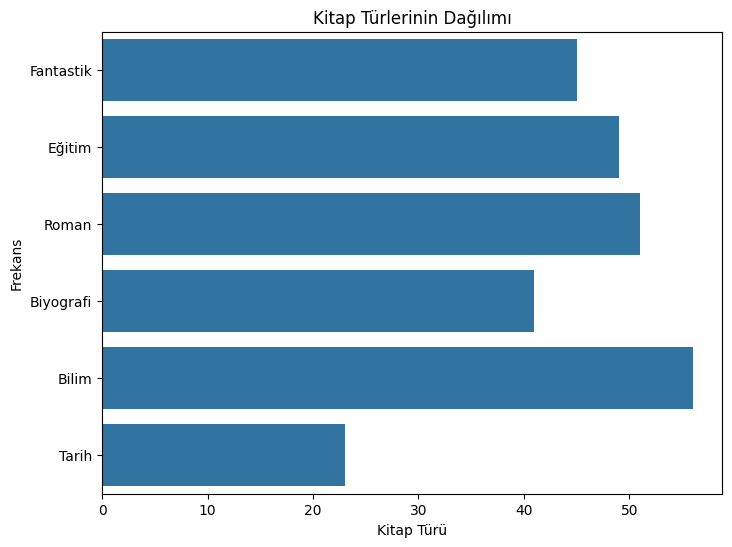

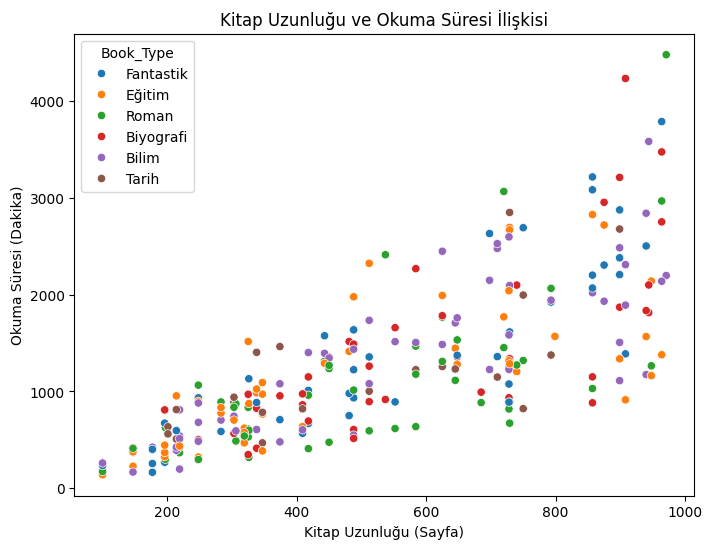

Mean Absolute Error (MAE): 118.53
Mean Squared Error (MSE): 30374.97
Root Mean Squared Error (RMSE): 174.28
R² Score: 0.96


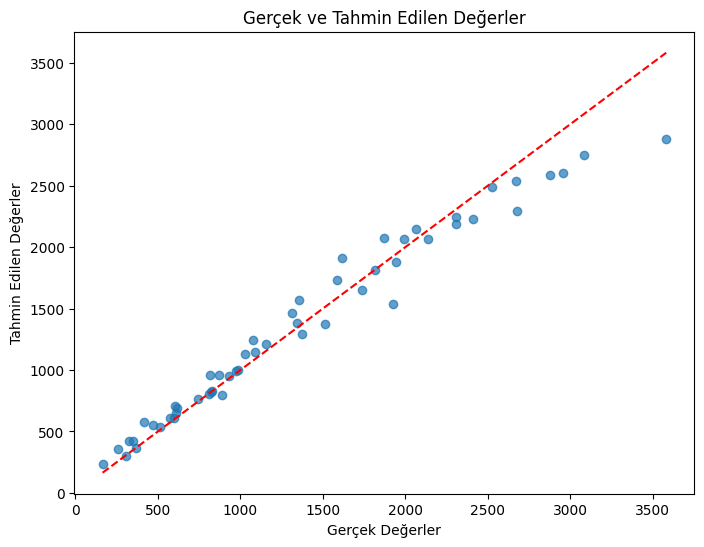

Tahmini Okuma Süresi: 622.21 dakika


In [4]:
import pandas as pd
import random


# Sentetik veri oluşturma
def generate_synthetic_data(num_users=100, num_books=50):
    # Kullanıcı verileri
    users = [f"User_{i}" for i in range(1, num_users + 1)]
    reading_speeds = [random.randint(150, 300) for _ in range(num_users)]  # Kelime/dakika

    # Kitap verileri
    book_ids = [f"Book_{i}" for i in range(1, num_books + 1)]
    book_types = ['Roman', 'Bilim', 'Tarih', 'Fantastik', 'Biyografi', 'Eğitim']
    book_difficulties = [random.uniform(1.0, 3.0) for _ in range(num_books)]  # Zorluk 1.0 (kolay) - 3.0 (zor)
    book_lengths = [random.randint(100, 1000) for _ in range(num_books)]  # Sayfa sayısı

    # Kullanıcı ve kitap eşleştirerek okuma süresi tahmini
    data = []
    for user, speed in zip(users, reading_speeds):
        for _ in range(random.randint(1, 5)):  # Her kullanıcı 1-5 kitap okumuş
            book = random.choice(book_ids)
            book_type = random.choice(book_types)
            book_length = random.choice(book_lengths)
            book_difficulty = random.uniform(1.0, 3.0)
            words_per_page = 250
            total_words = book_length * words_per_page
            reading_time = total_words / speed * book_difficulty  # Tahmini süre (dakika)

            data.append({
                "User": user,
                "Reading_Speed_WPM": speed,
                "Book_ID": book,
                "Book_Type": book_type,
                "Book_Length_Pages": book_length,
                "Book_Difficulty": round(book_difficulty, 2),
                "Reading_Time_Minutes": round(reading_time, 2)
            })

    return pd.DataFrame(data)

# Sentetik veri seti oluştur
synthetic_data = generate_synthetic_data(num_users=100, num_books=50)
synthetic_data.head()
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Veriyi Yükleme
# Sentetik veri (yukarıda oluşturulan veri kullanılıyor)
def generate_synthetic_data(num_users=100, num_books=50):
    users = [f"User_{i}" for i in range(1, num_users + 1)]
    reading_speeds = [np.random.randint(150, 300) for _ in range(num_users)]  # Kelime/dakika
    book_ids = [f"Book_{i}" for i in range(1, num_books + 1)]
    book_types = ['Roman', 'Bilim', 'Tarih', 'Fantastik', 'Biyografi', 'Eğitim']
    book_difficulties = [np.random.uniform(1.0, 3.0) for _ in range(num_books)]
    book_lengths = [np.random.randint(100, 1000) for _ in range(num_books)]

    data = []
    for user, speed in zip(users, reading_speeds):
        for _ in range(np.random.randint(1, 5)):  # Her kullanıcı 1-5 kitap okumuş
            book = np.random.choice(book_ids)
            book_type = np.random.choice(book_types)
            book_length = np.random.choice(book_lengths)
            book_difficulty = np.random.uniform(1.0, 3.0)
            words_per_page = 250
            total_words = book_length * words_per_page
            reading_time = total_words / speed * book_difficulty  # Tahmini süre (dakika)

            data.append({
                "User": user,
                "Reading_Speed_WPM": speed,
                "Book_ID": book,
                "Book_Type": book_type,
                "Book_Length_Pages": book_length,
                "Book_Difficulty": round(book_difficulty, 2),
                "Reading_Time_Minutes": round(reading_time, 2)
            })

    return pd.DataFrame(data)

data = generate_synthetic_data(num_users=100, num_books=50)

# 2. Veriyi İnceleme
print(data.head())
print(data.describe())

# Kitap türü dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data['Book_Type'])
plt.title("Kitap Türlerinin Dağılımı")
plt.xlabel("Kitap Türü")
plt.ylabel("Frekans")
plt.show()

# Okuma süresi ve kitap uzunluğu ilişkisi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Book_Length_Pages'], y=data['Reading_Time_Minutes'], hue=data['Book_Type'])
plt.title("Kitap Uzunluğu ve Okuma Süresi İlişkisi")
plt.xlabel("Kitap Uzunluğu (Sayfa)")
plt.ylabel("Okuma Süresi (Dakika)")
plt.show()

# 3. Veriyi Model için Hazırlama
# Gerekli dönüşümler
data['Book_Type'] = data['Book_Type'].astype('category').cat.codes  # Kategorik türü sayıya çevir
X = data[['Reading_Speed_WPM', 'Book_Length_Pages', 'Book_Difficulty', 'Book_Type']]
y = data['Reading_Time_Minutes']

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Eğitimi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Model Testi
y_pred = model.predict(X_test)

# Performans Metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 6. Tahmin ve Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.show()

# 7. Örnek Kullanıcı Tahmini
new_book = pd.DataFrame({
    "Reading_Speed_WPM": [200],
    "Book_Length_Pages": [300],
    "Book_Difficulty": [1.5],
    "Book_Type": [1]  # Örneğin, 'Bilim' türü
})
predicted_time = model.predict(new_book)
print(f"Tahmini Okuma Süresi: {predicted_time[0]:.2f} dakika")

